<a href="https://colab.research.google.com/github/hermannKonyar/Hotel-Reservation-Machine-Learning-Project/blob/main/hotel_reservation_machine_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Veriseti İnceleme
df = pd.read_csv("/content/drive/MyDrive/Colab Arşiv/Hotel Reservations.csv", sep = ",")
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:
# ID kolonunu veri setinden kaldıralım ve kategorik değişkenleri sayısal değişkenlere dönüştürelim.
df.drop('Booking_ID',axis=1,inplace=True)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=label_encoder.fit_transform(df[col])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  int64  
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  int64  
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

In [ ]:
models = {
    "Logistic": LogisticRegression(),
    "rfClassifier": RandomForestClassifier(),
    "tree": DecisionTreeClassifier(max_depth = 5, criterion = "gini"),
    "knClassifier": KNeighborsClassifier(n_neighbors = 5),
    "gBoost": GradientBoostingClassifier(),
    "Ada Boost": AdaBoostClassifier(n_estimators = 150),
    "Bagging": BaggingClassifier(n_estimators = 150),
    "xgBoost": XGBClassifier(),
    "catBoost": CatBoostClassifier(logging_level = "Silent"),
    "MLP Classifier":MLPClassifier(),
    "lightGBM": LGBMClassifier(),
    "svm": SVC(),
}

accuracy_scores = []
predicted = []

for i in models:
    models[i].fit(x_train, y_train)
    y_pred = models[i].predict(x_test)
    accuracy_scores.append(int(accuracy_score(y_pred, y_test) * 100))
    predicted.append(y_pred)

for j, k in zip(accuracy_scores, models):
    print (' ', k, ' accuracy : ', j, ' %  ')

  Logistic  accuracy :  78  %  
  rfClassifier  accuracy :  90  %  
  tree  accuracy :  82  %  
  knClassifier  accuracy :  80  %  
  gBoost  accuracy :  85  %  
  Ada Boost  accuracy :  82  %  
  Bagging  accuracy :  89  %  
  xgBoost  accuracy :  84  %  
  catBoost  accuracy :  89  %  
  MLP Classifier  accuracy :  80  %  
  lightGBM  accuracy :  88  %  
  svm  accuracy :  76  %  


rfClassifier  :  90  %


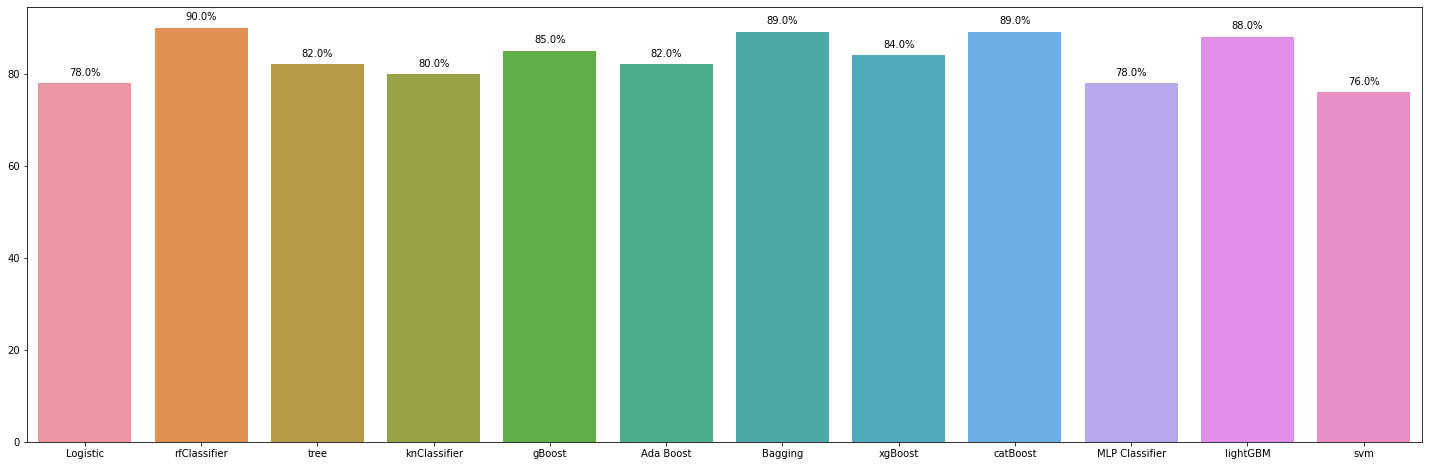

In [ ]:
plt.figure(figsize = (25, 8))
ax = sns.barplot(x = list(models.keys()), y = accuracy_scores)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy()
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center')

print (list(models.keys())[accuracy_scores.index(max(accuracy_scores))], " : " ,max(accuracy_scores), " %")